In [1]:
#This assignment is a tutorial so have a bit of fun with it
#If you would like to explore some additional options give it a try
#Goal is to provide some meaningful info to the restaurant owner
#Some notes below
#Both PCA and FA provide useful summary info for multivariate data, but
#all of the original variables are needed for their calculation, so 
#the big question is can we use them to find a subset of variables to 
#predict overall score?
#Also,trying to give meaningful labels to components is really hard.
#When the variables are on different scales you need to work with the 
#correlation matrix.  For this assignment they are on same scale so
#we will work with the raw data.
#PCA only helps if the original variables are correlated, if they 
#are independent PCA will not help.
#Approach takes two steps
#First step find the dimensionality of the data, that is the 
#number of original variables to be retained
#Second step find which ones, more on this below

In [2]:
# import packages for this example
import pandas as pd      
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn.decomposition import PCA, FactorAnalysis
import statsmodels.formula.api as smf  # R-like model specification

In [34]:
#Set some display options   
pd.set_option('display.notebook_repr_html', True) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 120)

In [35]:
#Read in the restaurant dataset
food_df = pd.read_csv('FACTOR1.csv')
#A good step to take is to convert all variable names to lower case
food_df.columns = [s.lower() for s in food_df.columns]
print(food_df)

     index  taste  temp  freshness  wait  clean  friend  location  parking  view  overall
0        1      6     7          8     4      5       5         8        8     7        6
1        2      5     5          6     5      6       4         8        9     9        6
2        3      6     7          5     7      8       8         6        8     4        6
3        4      7     9          6     5      6       4         7        7     7        6
4        5      7     8          6     3      3       3         6        7     6        6
..     ...    ...   ...        ...   ...    ...     ...       ...      ...   ...      ...
995    996      6     6          6     4      5       5         6        7     5        6
996    997      7     8          8     3      4       3         9       10     9        7
997    998      4     5          3     5      6       5         7        8     6        5
998    999      5     7          6     3      2       4         6        7     6        5
999   1000

In [5]:
print('')
print('----- Summary of Input Data -----')
print('')

# show the object is a DataFrame
print('Object type: ', type(food_df))

# show number of observations in the DataFrame
print('Number of observations: ', len(food_df))

# show variable names
print('Variable names: ', food_df.columns)

# show descriptive statistics
print(food_df.describe())


----- Summary of Input Data -----

Object type:  <class 'pandas.core.frame.DataFrame'>
Number of observations:  1000
Variable names:  Index(['index', 'taste', 'temp', 'freshness', 'wait', 'clean', 'friend', 'location', 'parking', 'view', 'overall'], dtype='object')
             index        taste         temp    freshness         wait        clean       friend     location  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000     6.001000     6.682000     6.054000     4.962000     5.637000     4.976000     7.022000   
std     288.819436     1.064017     1.384483     1.479619     1.038091     1.373724     1.446899     1.058601   
min       1.000000     2.000000     2.000000     1.000000     1.000000     2.000000     1.000000     4.000000   
25%     250.750000     5.000000     6.000000     5.000000     4.000000     5.000000     4.000000     6.000000   
50%     500.500000     6.000000     7.000000     6.0000

In [6]:
# show a portion of the beginning of the DataFrame
print(food_df.head())

   index  taste  temp  freshness  wait  clean  friend  location  parking  view  overall
0      1      6     7          8     4      5       5         8        8     7        6
1      2      5     5          6     5      6       4         8        9     9        6
2      3      6     7          5     7      8       8         6        8     4        6
3      4      7     9          6     5      6       4         7        7     7        6
4      5      7     8          6     3      3       3         6        7     6        6


In [7]:
#look at correlation structure
cdata = food_df.loc[:,['overall','taste','temp','freshness','wait','clean','friend','location','parking','view']] 
corr = cdata[cdata.columns].corr()
print(corr)

            overall     taste      temp  freshness      wait     clean    friend  location   parking      view
overall    1.000000  0.601032  0.547054   0.534843  0.427564  0.405603  0.350008  0.429164  0.399541  0.375520
taste      0.601032  1.000000  0.789812   0.729890 -0.026247  0.009836 -0.038996 -0.018682  0.003060  0.003171
temp       0.547054  0.789812  1.000000   0.589883 -0.007720  0.016614 -0.016306 -0.012297  0.005909  0.021782
freshness  0.534843  0.729890  0.589883   1.000000 -0.009742  0.028860  0.005749 -0.030157 -0.015049  0.004655
wait       0.427564 -0.026247 -0.007720  -0.009742  1.000000  0.779297  0.697821 -0.020189 -0.028527 -0.026728
clean      0.405603  0.009836  0.016614   0.028860  0.779297  1.000000  0.534478 -0.002763 -0.038822 -0.020836
friend     0.350008 -0.038996 -0.016306   0.005749  0.697821  0.534478  1.000000 -0.026450 -0.024107 -0.053633
location   0.429164 -0.018682 -0.012297  -0.030157 -0.020189 -0.002763 -0.026450  1.000000  0.792472  0.712758
p

## Add My Own Correlation Plot

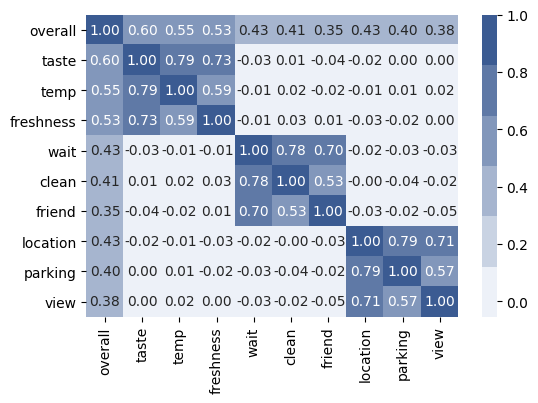

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# To get balance of size correctly
plt.rcParams['figure.dpi'] = 100

corr = cdata.corr()
ax = sns.heatmap(corr, annot=corr, fmt=".02f",
                 cmap=sns.light_palette(sns.xkcd_rgb["denim blue"]),
                 xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [8]:
#Use the correlation matrix to help provide advice to the restaurant owner

#Look at four different models and compare them
#Which model do you think is best and why?
#Model 1 full regression model
#Model 2 select my reduced regression model taste, wait and location
#Model 3 Full PCA model
#Model 4 Reduced PCA model with parking, taste and clean
#Model 5 FA model

#First find the PCA
#Second find the FA
#Run the models
#Compare the models and show VIF for each model


In [9]:
#PCA
print('')
print('----- Principal Component Analysis -----')
print('')
pca_data = food_df.loc[:,['taste','temp','freshness','wait','clean','friend','location','parking','view']] 
pca = PCA()
P = pca.fit(pca_data)
print(pca_data)
np.set_printoptions(threshold=np.inf) 
np.around([pca.components_], decimals=3)


----- Principal Component Analysis -----

     taste  temp  freshness  wait  clean  friend  location  parking  view
0        6     7          8     4      5       5         8        8     7
1        5     5          6     5      6       4         8        9     9
2        6     7          5     7      8       8         6        8     4
3        7     9          6     5      6       4         7        7     7
4        7     8          6     3      3       3         6        7     6
..     ...   ...        ...   ...    ...     ...       ...      ...   ...
995      6     6          6     4      5       5         6        7     5
996      7     8          8     3      4       3         9       10     9
997      4     5          3     5      6       5         7        8     6
998      5     7          6     3      2       4         6        7     6
999      7     7          7     5      5       4         8       10    10

[1000 rows x 9 columns]


array([[[-0.475, -0.595, -0.645, -0.003, -0.032, -0.001,  0.038,  0.033,
          0.023],
        [-0.033, -0.042, -0.022,  0.284,  0.356,  0.389, -0.379, -0.456,
         -0.535],
        [ 0.003, -0.012, -0.013, -0.384, -0.489, -0.505, -0.296, -0.341,
         -0.393],
        [-0.013, -0.049,  0.092, -0.118, -0.612,  0.664,  0.056,  0.288,
         -0.27 ],
        [-0.117, -0.535,  0.575, -0.039, -0.108,  0.122, -0.099, -0.389,
          0.424],
        [-0.045, -0.421,  0.424,  0.022,  0.255, -0.275,  0.139,  0.476,
         -0.504],
        [-0.073,  0.053,  0.003, -0.688,  0.321,  0.2  ,  0.526, -0.285,
         -0.135],
        [-0.856,  0.412,  0.245, -0.032,  0.03 , -0.021, -0.154,  0.103,
          0.019],
        [ 0.139, -0.07 , -0.063, -0.532,  0.28 ,  0.147, -0.659,  0.35 ,
          0.181]]])

In [10]:
#Note per Everett p209 pick the three variables with the largest
#absolute coefficient on the component not already picked
#So, choose parking, taste and clean for the PCA variable reduction model
 
# show summary of pca solution
pca_explained_variance = pca.explained_variance_ratio_
print('Proportion of variance explained:', pca_explained_variance)

Proportion of variance explained: [0.27051531 0.26603802 0.24572407 0.06231153 0.05578657 0.05420122
 0.01592382 0.01532158 0.01417787]


In [11]:
# note that principal components analysis corresponds
# to finding eigenvalues and eigenvectors of the pca_data
pca_data_cormat = np.corrcoef(pca_data.T)
eigenvalues, eigenvectors = np.linalg.eig(pca_data_cormat)
np.around([eigenvalues], decimals=3)

array([[2.282, 2.414, 2.449, 0.484, 0.429, 0.412, 0.165, 0.175, 0.189]])

In [12]:
print('Linear algebra demonstration: Proportion of variance explained: ',
    eigenvalues/eigenvalues.sum())
np.around([eigenvectors], decimals=3)

Linear algebra demonstration: Proportion of variance explained:  [0.25359443 0.26825439 0.27211982 0.05372803 0.04771918 0.04576782
 0.01836695 0.01949504 0.02095434]


array([[[-0.083,  0.6  , -0.024, -0.008, -0.081,  0.079, -0.246, -0.746,
         -0.058],
        [-0.092,  0.563, -0.024, -0.031, -0.208,  0.597,  0.164,  0.491,
          0.068],
        [-0.086,  0.545, -0.041,  0.081,  0.302, -0.7  ,  0.132,  0.299,
         -0.01 ],
        [-0.479, -0.099, -0.37 , -0.109, -0.049,  0.018,  0.435, -0.099,
         -0.641],
        [-0.452, -0.067, -0.344, -0.551, -0.229, -0.165, -0.321,  0.094,
          0.422],
        [-0.418, -0.093, -0.337,  0.697,  0.296,  0.169, -0.175, -0.002,
          0.266],
        [-0.375, -0.045,  0.478,  0.037, -0.112, -0.056,  0.594, -0.235,
          0.451],
        [-0.345, -0.028,  0.456,  0.29 , -0.507, -0.181, -0.401,  0.191,
         -0.318],
        [-0.329, -0.016,  0.438, -0.326,  0.669,  0.236, -0.243,  0.058,
         -0.167]]])

## My Own Bar Plot

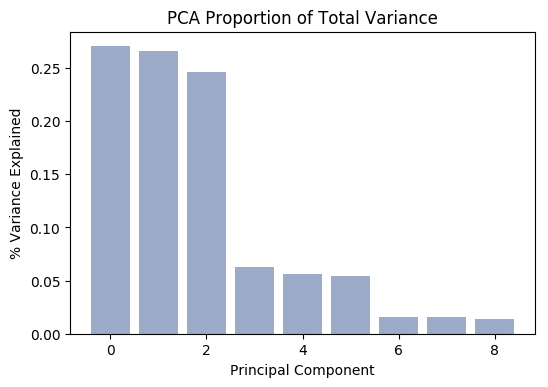

In [46]:
# show the plot for the pricipal component analysis
plt.bar(np.arange(len(pca_explained_variance)), pca_explained_variance, 
    color = sns.xkcd_rgb["denim blue"], alpha = 0.5, align = 'center')
plt.title('PCA Proportion of Total Variance')
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.show()

## Default Bar Plot

In [ ]:
# show the plot for the pricipal component analysis
plt.bar(np.arange(len(pca_explained_variance)), pca_explained_variance, 
    color = 'grey', alpha = 0.5, align = 'center')
plt.title('PCA Proportion of Total Variance')
plt.show()

   eigenvalues  0
0     2.282350  1
1     2.414290  2
2     2.449078  3
3     0.483552  4
4     0.429473  5
5     0.411910  6
6     0.165303  7
7     0.175455  8
8     0.188589  9


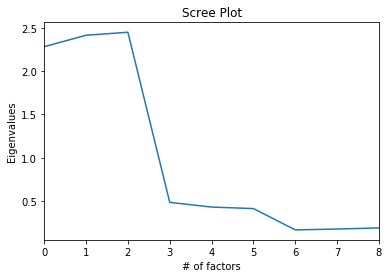

In [14]:
# show a scree plot 
d = {'eigenvalues': eigenvalues }
df1 = pd.DataFrame(data=d)
df2 =pd.Series([1,2,3,4,5,6,7,8,9])
#df2 = {'factors': factors}
# merge eigenvalues with # of factors
result = pd.concat([df1, df2], axis=1, join_axes=[df2.index])
print (result)

def scat(dataframe,var1,var2):
    dataframe[var2].plot()     
    plt.title('Scree Plot')
    plt.xlabel('# of factors')
    plt.ylabel('Eigenvalues')
    
scat(result,'0','eigenvalues')
plt.show()

In [15]:
# provide partial listing of variable loadings on principal components
# transpose for variables by components listing
pca_loadings = pca.components_.T

# provide full formatted listing of loadings for first three components
# print loadings while rounding to three digits 
# and suppress printing of very small numbers
# but do not suppress printing of zeroes
np.set_printoptions(precision = 3, suppress = True,
    formatter={'float': '{: 0.3f}'.format})
print(pca_loadings[:,0:3])  

[[-0.475 -0.033  0.003]
 [-0.595 -0.042 -0.012]
 [-0.645 -0.022 -0.013]
 [-0.003  0.284 -0.384]
 [-0.032  0.356 -0.489]
 [-0.001  0.389 -0.505]
 [ 0.038 -0.379 -0.296]
 [ 0.033 -0.456 -0.341]
 [ 0.023 -0.535 -0.393]]


In [16]:
# compute full set of principal components (scores)
C = pca.transform(pca_data)
print(C)

[[-1.375 -1.051  0.249  0.821  0.849  0.773  0.916  0.500 -0.350]
 [ 1.627 -2.167 -1.199 -0.900  1.079  0.832 -0.245  0.202  0.089]
 [ 0.307  4.464 -2.071  1.044 -2.024  0.742 -0.240 -0.055  0.302]
 [-1.854 -0.039  0.523 -1.214 -1.268 -1.026  0.135  0.047 -0.316]
 [-1.217 -1.106  3.963  0.458 -0.779 -0.775 -0.096 -0.237  0.308]
 [-2.382 -3.377  0.104  0.596  1.752  0.639 -0.230  0.021  0.009]
 [ 0.946 -1.511  2.175  0.393  0.902  2.035  0.294  0.279 -1.041]
 [ 1.394  2.963 -0.284 -0.608  0.159 -0.479  0.047  0.266 -0.148]
 [-1.930  0.256  2.084 -0.128 -0.337 -0.093  0.061  0.016  0.421]
 [-0.261  1.302  0.677 -0.782  0.530 -1.027  0.062  0.109  0.142]
 [ 2.777  0.029  1.979 -0.958 -0.480  0.425 -0.322 -0.408 -0.795]
 [-1.112 -1.686 -2.119 -0.526 -0.679 -0.775 -0.720 -0.327 -0.229]
 [-0.057  0.835  0.352 -0.599 -0.551 -1.021 -0.300 -0.890  0.693]
 [ 0.471 -2.232 -0.408 -1.540  1.514  1.347 -1.041 -0.234  0.676]
 [ 0.393 -0.098  3.890  0.227 -0.123  0.872  0.327 -0.194  0.409]
 [-3.411 -

In [48]:
# add first three principal component scores to the original data frame
pca_data['pca1'] = C[:,0]
pca_data['pca2'] = C[:,1]
pca_data['pca3'] = C[:,2]
# Add remaining - Alan 
pca_data['pca4'] = C[:,3]
pca_data['pca5'] = C[:,4]
pca_data['pca6'] = C[:,5]
pca_data['pca7'] = C[:,6]
pca_data['pca8'] = C[:,7]
pca_data['pca9'] = C[:,8]
print(pca_data) 

     taste  temp  freshness  wait  clean  friend  location  parking  view      pca1      pca2      pca3      pca4  \
0        6     7          8     4      5       5         8        8     7 -1.374753 -1.051124  0.248970  0.820839   
1        5     5          6     5      6       4         8        9     9  1.627366 -2.166975 -1.198849 -0.899655   
2        6     7          5     7      8       8         6        8     4  0.307264  4.463872 -2.070600  1.044309   
3        7     9          6     5      6       4         7        7     7 -1.853539 -0.039391  0.522603 -1.213537   
4        7     8          6     3      3       3         6        7     6 -1.216772 -1.106078  3.963076  0.457818   
..     ...   ...        ...   ...    ...     ...       ...      ...   ...       ...       ...       ...       ...   
995      6     6          6     4      5       5         6        7     5  0.355509  1.319526  2.007853  0.825515   
996      7     8          8     3      4       3         9      

In [50]:
# add first three principal component scores to the food_df
food_df['pca1'] = C[:,0]
food_df['pca2'] = C[:,1]
food_df['pca3'] = C[:,2]
# Add remaining - Alan 
food_df['pca4'] = C[:,3]
food_df['pca5'] = C[:,4]
food_df['pca6'] = C[:,5]
food_df['pca7'] = C[:,6]
food_df['pca8'] = C[:,7]
food_df['pca9'] = C[:,8]
print(food_df)

     index  taste  temp  freshness  wait  clean  friend  location  parking  view  overall      pca1      pca2  \
0        1      6     7          8     4      5       5         8        8     7        6 -1.374753 -1.051124   
1        2      5     5          6     5      6       4         8        9     9        6  1.627366 -2.166975   
2        3      6     7          5     7      8       8         6        8     4        6  0.307264  4.463872   
3        4      7     9          6     5      6       4         7        7     7        6 -1.853539 -0.039391   
4        5      7     8          6     3      3       3         6        7     6        6 -1.216772 -1.106078   
..     ...    ...   ...        ...   ...    ...     ...       ...      ...   ...      ...       ...       ...   
995    996      6     6          6     4      5       5         6        7     5        6  0.355509  1.319526   
996    997      7     8          8     3      4       3         9       10     9        7 -2.255

In [19]:
# explore relationships between pairs of principal components
# working with the first three components only
pca_scores = pca_data.loc[:,['pca1','pca2', 'pca3']]
pca_model_cormat = \
    np.corrcoef(pca_scores.as_matrix().transpose()).round(decimals=3)
print(pca_model_cormat)
#Looks like that worked

[[ 1.000  0.000 -0.000]
 [ 0.000  1.000 -0.000]
 [-0.000 -0.000  1.000]]


In [20]:
#Factor Analysis
print('')
print('----- Factor Analysis (Unrotated) -----')
print('')
 
# assume three factors will be sufficient 
# this is an unrotated orthogonal solution
# maximum likelihood estimation is employed
# for best results set tolerance low and max iterations high
fa = FactorAnalysis(n_components = 3, tol=1e-8, max_iter=1000000)  

#the unrotated solution
fa.fit(pca_data)

# retrieve the factor loadings as an array of arrays
# transpose for variables by factors listing of loadings
fa_loadings = fa.components_.T
print(fa_loadings)


----- Factor Analysis (Unrotated) -----

[[-0.967 -0.066  0.006]
 [-1.213 -0.085 -0.024]
 [-1.315 -0.044 -0.025]
 [-0.006  0.573 -0.746]
 [-0.065  0.718 -0.949]
 [-0.003  0.787 -0.980]
 [ 0.077 -0.766 -0.575]
 [ 0.068 -0.921 -0.662]
 [ 0.048 -1.081 -0.764]
 [ 2.037 -0.000  0.000]
 [ 0.000  2.021 -0.000]
 [-0.000  0.000  1.942]]


In [21]:
# show the loadings of the variables on the factors
# for the unrotated maximum likelihood solution
# print loadings while rounding to three digits 
# and suppress printing of very small numbers
# but do not suppress printing of zeroes
np.set_printoptions(precision = 3, suppress = True,
    formatter={'float': '{: 0.3f}'.format})
print(fa_loadings) 

[[-0.967 -0.066  0.006]
 [-1.213 -0.085 -0.024]
 [-1.315 -0.044 -0.025]
 [-0.006  0.573 -0.746]
 [-0.065  0.718 -0.949]
 [-0.003  0.787 -0.980]
 [ 0.077 -0.766 -0.575]
 [ 0.068 -0.921 -0.662]
 [ 0.048 -1.081 -0.764]
 [ 2.037 -0.000  0.000]
 [ 0.000  2.021 -0.000]
 [-0.000  0.000  1.942]]


In [22]:
# compute full set of factor scores
F = fa.transform(pca_data)
print(F)

[[-0.675 -0.520  0.128]
 [ 0.799 -1.072 -0.617]
 [ 0.151  2.209 -1.066]
 [-0.910 -0.019  0.269]
 [-0.597 -0.547  2.041]
 [-1.169 -1.671  0.054]
 [ 0.465 -0.748  1.120]
 [ 0.684  1.466 -0.146]
 [-0.947  0.127  1.073]
 [-0.128  0.645  0.349]
 [ 1.363  0.014  1.019]
 [-0.546 -0.834 -1.091]
 [-0.028  0.413  0.181]
 [ 0.231 -1.105 -0.210]
 [ 0.193 -0.049  2.003]
 [-1.674 -2.551  1.216]
 [ 1.647 -0.128  0.787]
 [-0.314 -0.243  0.079]
 [ 1.126 -0.886  0.621]
 [-0.106  0.367  0.825]
 [-0.286 -1.904  0.986]
 [-1.191 -0.150  0.533]
 [ 0.274  2.674  0.782]
 [-2.231 -2.621 -0.235]
 [ 0.327 -1.784  1.453]
 [ 0.258 -1.077 -0.187]
 [-1.115 -2.043 -0.926]
 [ 1.120  0.206 -0.408]
 [ 0.446  0.135 -1.269]
 [-1.716 -0.293 -1.854]
 [ 0.828 -0.979  0.508]
 [ 0.304 -1.171  0.030]
 [-0.479  1.180 -0.745]
 [-1.224 -0.070  1.319]
 [-0.699  1.712  0.058]
 [-0.845  0.839  0.815]
 [ 1.342  0.487 -0.206]
 [ 1.651  0.603 -1.237]
 [-0.343 -0.512 -2.067]
 [ 0.180  0.440  0.179]
 [-1.390 -2.381 -0.483]
 [-0.568 -1.101 

In [23]:
# add factor scores to the original data frame
food_df['fa1'] = F[:,0]
food_df['fa2'] = F[:,1]
food_df['fa3'] = F[:,2]
print(food_df) 

     index  taste  temp  freshness  wait  clean  friend  location  parking  view  overall      pca1      pca2  \
0        1      6     7          8     4      5       5         8        8     7        6 -1.374753 -1.051124   
1        2      5     5          6     5      6       4         8        9     9        6  1.627366 -2.166975   
2        3      6     7          5     7      8       8         6        8     4        6  0.307264  4.463872   
3        4      7     9          6     5      6       4         7        7     7        6 -1.853539 -0.039391   
4        5      7     8          6     3      3       3         6        7     6        6 -1.216772 -1.106078   
..     ...    ...   ...        ...   ...    ...     ...       ...      ...   ...      ...       ...       ...   
995    996      6     6          6     4      5       5         6        7     5        6  0.355509  1.319526   
996    997      7     8          8     3      4       3         9       10     9        7 -2.255

In [24]:
#Look at five different models and compare them
#Which model do you think is best and why?
#Model 1 full regression model
#Model 2 select my reduced regression model taste, wait and location
#Model 3 Full PCA model
#Model 4 Reduced PCA model with parking, taste and clean
#Model 5 FA model

#Run the Models
#Model 1 full model
regress_model_fit = smf.ols(formula = 'overall~taste+temp+freshness+wait+clean+friend+location+parking+view', data = food_df).fit()
# summary of model fit  
print(regress_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     507.9
Date:                Mon, 12 Feb 2018   Prob (F-statistic):               0.00
Time:                        21:37:52   Log-Likelihood:                -179.96
No. Observations:                1000   AIC:                             379.9
Df Residuals:                     990   BIC:                             429.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0745      0.094      0.789      0.4

In [25]:
#Model 2
#Note, Model 2 is a choice from looking at the correlation, you may choose a
#different selection for this if you like, just explain why 
regress_model_fit = smf.ols(formula = 'overall~taste+wait+location', data = food_df).fit()
# summary of model fit  
print(regress_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1052.
Date:                Mon, 12 Feb 2018   Prob (F-statistic):          3.27e-308
Time:                        21:37:52   Log-Likelihood:                -328.95
No. Observations:                1000   AIC:                             665.9
Df Residuals:                     996   BIC:                             685.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2025      0.109      1.864      0.0

In [51]:
#Model 3
#regress the response overall on principal components
pca_model_fit = smf.ols(formula = 'overall~pca1+pca2+pca3+pca4+pca5+pca6+pca7+pca8+pca9', data = food_df).fit()
# summary of model fit  
print(pca_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     507.9
Date:                Tue, 13 Feb 2018   Prob (F-statistic):               0.00
Time:                        06:28:47   Log-Likelihood:                -179.96
No. Observations:                1000   AIC:                             379.9
Df Residuals:                     990   BIC:                             429.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1470      0.009    667.670      0.0

In [52]:
#Model 4
#regress the response overall on principal components
pca_model_fit = smf.ols(formula = 'overall~pca1+pca2+pca3', data = food_df).fit()
# summary of model fit  
print(pca_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1315.
Date:                Tue, 13 Feb 2018   Prob (F-statistic):               0.00
Time:                        06:29:19   Log-Likelihood:                -241.98
No. Observations:                1000   AIC:                             492.0
Df Residuals:                     996   BIC:                             511.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1470      0.010    629.417      0.0

In [28]:
#Model 5 
#regress the response overall on factor scores
fa_model_fit = smf.ols(formula = 'overall~fa1+fa2+fa3', data = food_df).fit()
# summary of model fit  
print(fa_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1315.
Date:                Mon, 12 Feb 2018   Prob (F-statistic):               0.00
Time:                        21:37:52   Log-Likelihood:                -241.98
No. Observations:                1000   AIC:                             492.0
Df Residuals:                     996   BIC:                             511.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1470      0.010    629.419      0.0

In [29]:
#next look at VIF to see what the full, choice, PCA and FA models did
# Break into left and right hand side; y and X then find VIF for each model
import statsmodels.formula.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y = food_df.loc[:,['overall']]
X = food_df.loc[:,['taste','temp','freshness','wait','clean','friend','location','parking','view']]
y, X = dmatrices('overall ~ taste+temp+freshness+wait+clean+friend+location+parking+view ', data=food_df, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('')
print('----- VIF for Full Regression Model -----')
print('')
print(vif)


----- VIF for Full Regression Model -----

[105.31057172729297, 3.7339305023025977, 2.666947996579804, 2.155696222950924, 3.5665022511678393, 2.5722838192097766, 1.9647506059999649, 3.723110119062428, 2.7064357263205463, 2.046687628686199]


In [53]:
#VIF for choice model
y = food_df.loc[:,['overall']]
X = food_df.loc[:,['taste','clean','location']] 
y, X = dmatrices('overall ~ taste+wait+location ', data=food_df, return_type="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('')
print('----- VIF for Choice Model -----')
print('')
print(vif) 


----- VIF for Choice Model -----

[104.04412778717976, 1.001059279040755, 1.0011179362680949, 1.0007775584240306]


In [31]:
#VIF for PCA
y = food_df.loc[:,['overall']]
X = food_df.loc[:,['pca1','pca2','pca3']] 
y, X = dmatrices('overall ~ pca1+pca2+pca3 ', data=food_df, return_type="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('')
print('----- VIF for PCA Model -----')
print('')
print(vif)


----- VIF for PCA Model -----

[1.0, 1.0, 0.9999999999999998, 1.0]


In [32]:
#VIF for FA
y = food_df.loc[:,['overall']]
X = food_df.loc[:,['fa1','fa2','fa3']] 
y, X = dmatrices('overall ~ fa1+fa2+fa3 ', data=food_df, return_type="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('')
print('----- VIF for FA Model -----')
print('')
print(vif)


----- VIF for FA Model -----

[1.0, 0.9999999999999998, 1.0, 1.0]


In [33]:
#Which model do you like best and why?
#For the full regression model sum the coefficients for each three variable
#grouping, taste, temp freshness group 1
#wait, clean, friend group 2
# location, parking, view group 3
#How do you interpret this info?
#Compare with the choice model

In [59]:
group1 = .2248+.0788+.0899
print("Group 1: {:.4f}".format(group1))
group2 = .1552+.0797+.0597
print("Group 2: {:.4f}".format(group2))
group3 = .1706+.066+.0625
print("Group 3: {:.4f}".format(group3))

Group 1: 0.3935
Group 2: 0.2946
Group 3: 0.2991
